# Iris Dataset - SOFeNN Example

In [ ]:
import keras
from sofenn.layers import FuzzyLayer
from sofenn.layers.DefuzzyLayer import DefuzzyLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np

x_train = np.random.normal(5, 1, size=(100, 2))
y_train = np.random.normal(5, 15, size=(100, 4))

model = Sequential()
model.add(Dense(2, activation='sigmoid'))
model.add(FuzzyLayer(8))
model.add(Dense(8, activation='sigmoid'))
model.add(DefuzzyLayer(4))

model.compile(loss='logcosh',
              optimizer='rmsprop',
              metrics=['mae', 'acc'])

model.fit(x_train, y_train,
          epochs=10000,
          verbose=1,
          batch_size=100)

print(model.predict( np.array([[5, 5]])))
print(model.predict( np.array([[5, 15]])))
print(model.predict( np.array([[15, 5]])))
print(model.predict( np.array([[15, 15]])))

In [1]:
import numpy as np
import random as rnd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import keras
import keras.backend as K

from keras.optimizers import SGD
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input

from sofenn.layers.DefuzzyLayer import DefuzzyLayer
from sofenn.layers import FuzzyLayer, NormalizedLayer, WeightedLayer, OutputLayer

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'


# custom loss function
def loss_function(y_true, y_pred):
    """
    Custom loss function

    E = exp{-sum[i=1,j; 1/2 * [pred(j) - test(j)]^2]}

    Parameters
    ==========
    y_true : np.array
        - true values
    y_pred : np.array
        - predicted values
    """
    return K.sum(1 / 2 * K.square(y_pred - y_true))

iris = datasets.load_iris()
Y=[]
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)

X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

neurons = 3
K = neurons

indices = rnd.sample(range(len(X_train)), K)

samples, feats = X_train.shape

inputs = Input(name='Inputs', shape=(feats,))
fuzz = FuzzyLayer(neurons, input_dim=feats,
                  initializer_centers=
                  lambda x: np.transpose(np.array([X_train[i] for i in indices])))
#defuzz = DefuzzyLayer(5, input_dim=neurons)
norm = NormalizedLayer(neurons)
weights = WeightedLayer(neurons)
pred = Dense(3, activation='softmax')

# run through layers
phi = fuzz(inputs)
psi = norm(phi)
f = weights([inputs, psi])
output = pred(f)

# define model
model = Model(inputs=inputs, outputs=output)

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(np.array(X_train),
          np.array(y_train),
          epochs=50,
          verbose=1,
          batch_size=1)

/miniconda3/envs/finance/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Epoch 1/50
135/135 [==============================] - 1s 8ms/step - loss: 0.1874 - binary_accuracy: 0.6716
Epoch 2/50
135/135 [==============================] - 0s 2ms/step - loss: 0.1169 - binary_accuracy: 0.8840
Epoch 3/50
135/135 [==============================] - 0s 2ms/step - loss: 0.0614 - binary_accuracy: 0.9778
Epoch 4/50
135/135 [==============================] - 0s 2ms/step - loss: 0.0358 - binary_accuracy: 0.9802
Epoch 5/50
135/135 [==============================] - 0s 2ms/step - loss: 0.0262 - binary_accuracy: 0.9802
Epoch 6/50
135/135 [==============================] - 0s 2ms/step - loss: 0.0218 - binary_accuracy: 0.9802
Epoch 7/50
135/135 [==============================] - 0s 2ms/step - loss: 0.0195 - binary_accuracy: 0.9802
Epoch 8/50
135/135 [==============================] - 0s 2ms/step - loss: 0.0178 - binary_accuracy: 0.9802
Epoch 9/50
135/135 [==============================] - 0s 2ms/step - loss: 0.0169 - binary_accuracy: 0.9802
Epoch 10/50
135/135 [================

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 640x480 with 1 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


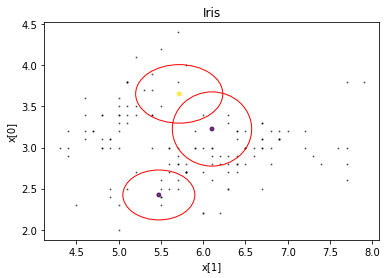

In [2]:
w = fuzz.get_weights()


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], c=(0,0,0), alpha=0.5,s=1)
for i in range(0,K):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='r', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], c=(1,0,0), alpha=0.8,s=15)
plt.show()